In [35]:
import seaborn as sns
import pandas as pd

'C:\\Users\\DATA\\PycharmProjects\\Dacon\\Radar\\src'

In [5]:
train =  pd.read_csv("../data/train.csv")

In [6]:
train

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,TRAIN_39603,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,...,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,TRAIN_39604,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,...,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,TRAIN_39605,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,...,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,TRAIN_39606,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,...,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [8]:
x_info = pd.read_csv("../data/meta/x_feature_info.csv")

In [77]:
y_info = pd.read_csv("../data/meta/y_feature_info.csv")

In [78]:
y_info

,Feature,설명
0,Y_01,안테나 Gain 평균 (각도1)
1,Y_02,안테나 1 Gain 편차
2,Y_03,안테나 2 Gain 편차
3,Y_04,평균 신호대 잡음비
4,Y_05,안테나 Gain 평균 (각도2)
5,Y_06,신호대 잡음비 (각도1)
6,Y_07,안테나 Gain 평균 (각도3)
7,Y_08,신호대 잡음비 (각도2)
8,Y_09,신호대 잡음비 (각도3)
9,Y_10,신호대 잡음비 (각도4)


In [79]:
train

,ID,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,101.892,74.983,29.45,62.38,245.71,0.0,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,101.944,72.943,28.73,61.23,233.61,0.0,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,103.153,72.943,28.81,105.77,272.20,0.0,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,101.971,77.022,28.92,115.21,255.36,0.0,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,101.981,70.904,29.68,103.38,241.46,0.0,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,TRAIN_39603,66.465,103.320,62.27,103.150,66.825,30.20,77.83,298.05,0.0,...,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,TRAIN_39604,66.465,103.321,62.77,102.021,66.825,29.21,102.25,270.67,0.0,...,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,TRAIN_39605,68.504,103.320,64.67,103.144,68.864,29.96,102.61,198.07,0.0,...,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,TRAIN_39606,66.465,103.320,63.67,102.025,67.845,30.30,112.60,275.52,0.0,...,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [42]:
# 통과여부 , 필요없는컬럼
train['X_04'].value_counts()

1    39607
Name: X_04, dtype: int64

In [45]:
train = train.drop(columns='X_04')

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,TRAIN_39603,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,...,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,TRAIN_39604,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,...,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,TRAIN_39605,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,...,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,TRAIN_39606,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,...,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [ ]:
# 각 값별 분포도를 보자

# 어느정도 대다수의 분포값이 있다
train['X_01'].value_counts().plot.bar()

<AxesSubplot:>

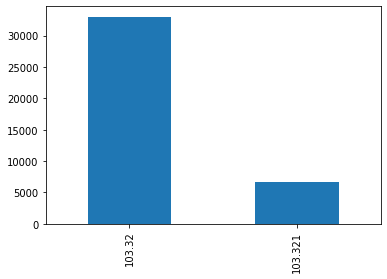

In [22]:
train['X_02'].value_counts().plot.bar()

In [28]:
train

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,TRAIN_39603,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,...,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,TRAIN_39604,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,...,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,TRAIN_39605,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,...,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,TRAIN_39606,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,...,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [ ]:
info

In [30]:
# 연관컬럼 엮기


# PCB 체결 시 단계별 누름량(Step 1,2,3,4)
pcb_step_push_amt = train[['X_01','X_02','X_05','X_06']]

<AxesSubplot:>

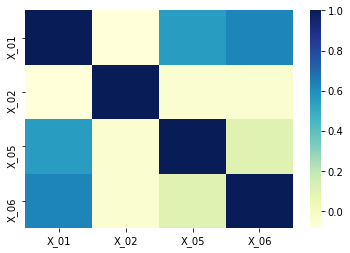

In [46]:
# 단계별 유사도값
pcb_step_push_amt_pearson = pcb_step_push_amt.corr()
#X_01과 X_06은 어느정도 상관관계가 있다,왜일까?
sns.heatmap(pcb_step_push_amt_pearson,cmap='YlGnBu')

In [48]:
#방열재료면적1,2,3

train[['X_07','X_08','X_09']]

,X_07,X_08,X_09
0,29.45,62.38,245.71
1,28.73,61.23,233.61
2,28.81,105.77,272.20
3,28.92,115.21,255.36
4,29.68,103.38,241.46
...,...,...,...
39602,30.20,77.83,298.05
39603,29.21,102.25,270.67
39604,29.96,102.61,198.07
39605,30.30,112.60,275.52


In [49]:
pt_heat_mat_area = train[['X_07','X_08','X_09']]

In [53]:
# 면적끼리의 상관관게는 역시없다시피하다
pt_heat_mat_area_corr = pt_heat_mat_area.corr()

X_12
4.38    9034
4.37    6543
4.36    5268
4.39    4667
4.35    4536
4.40    3067
4.34    2163
4.41    1591
4.33    1136
4.42     727
4.32     291
4.43     269
4.31     124
4.44     117
4.45      26
4.46      22
4.30      15
4.47       6
4.28       2
4.48       1
4.27       1
4.49       1
dtype: int64

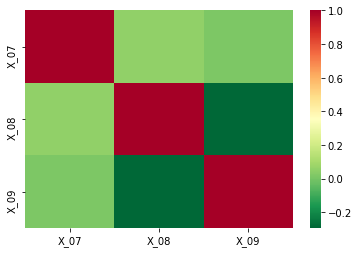

In [63]:
sns.heatmap(pt_heat_mat_area_corr,cmap='RdYlGn_r')
##%%
# 커넥터 위치기준 좌표(커넥터로부터의 거리)
train[['X_12']].value_counts()

<AxesSubplot:>

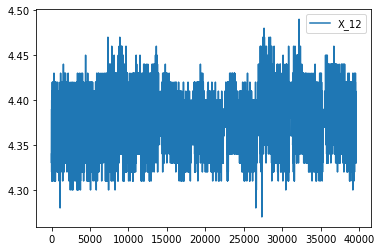

In [81]:
# 이상치를 제거해볼까
train[['X_12']].plot()

In [75]:
spec_info = pd.read_csv("../data/meta/y_feature_spec_info.csv")

In [76]:
# y_feature들이 값안에 잘들어가도록
spec_info

,Feature,최소,최대
0,Y_01,0.2,2.0
1,Y_02,0.2,2.1
2,Y_03,0.2,2.1
3,Y_04,7.0,19.0
4,Y_05,22.0,36.5
5,Y_06,-19.2,19.0
6,Y_07,2.4,4.0
7,Y_08,-29.2,-24.0
8,Y_09,-29.2,-24.0
9,Y_10,-30.6,-20.0


In [90]:
x_col = [col for col in train.columns if 'X' in col]
y_col = [col for col in train.columns if 'Y' in col]

In [91]:
x_train = train[x_col]
y_train = train[y_col]

In [ ]:
# x값에 의한 y값을 잘 계산한다

In [92]:
x_train

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,X_11,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,101.892,74.983,29.45,62.38,245.71,0.0,0.0,...,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,101.944,72.943,28.73,61.23,233.61,0.0,0.0,...,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,103.153,72.943,28.81,105.77,272.20,0.0,0.0,...,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,103.320,67.57,101.971,77.022,28.92,115.21,255.36,0.0,0.0,...,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,103.320,63.57,101.981,70.904,29.68,103.38,241.46,0.0,0.0,...,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,62.27,103.150,66.825,30.20,77.83,298.05,0.0,0.0,...,1,1,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,103.321,62.77,102.021,66.825,29.21,102.25,270.67,0.0,0.0,...,1,1,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,103.320,64.67,103.144,68.864,29.96,102.61,198.07,0.0,0.0,...,1,1,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,103.320,63.67,102.025,67.845,30.30,112.60,275.52,0.0,0.0,...,1,1,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


In [93]:
y_train

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,2.056,1.456,1.680,10.502,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,1.382,1.215,1.263,10.874,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,1.482,0.606,1.083,8.759,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,1.117,1.154,0.993,13.159,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,0.895,0.187,0.477,9.123,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [94]:
#정상값들의 분포를 보고 패턴을 찾자

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,2.056,1.456,1.680,10.502,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,1.382,1.215,1.263,10.874,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,1.482,0.606,1.083,8.759,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,1.117,1.154,0.993,13.159,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,0.895,0.187,0.477,9.123,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [97]:
spec_info

,Feature,최소,최대
0,Y_01,0.2,2.0
1,Y_02,0.2,2.1
2,Y_03,0.2,2.1
3,Y_04,7.0,19.0
4,Y_05,22.0,36.5
5,Y_06,-19.2,19.0
6,Y_07,2.4,4.0
7,Y_08,-29.2,-24.0
8,Y_09,-29.2,-24.0
9,Y_10,-30.6,-20.0


In [105]:
y_min = spec_info[spec_info.Feature =='Y_01']['최소'][0]

In [106]:
y_max = spec_info[spec_info.Feature =='Y_01']['최대'][0]

0.2

In [127]:
(train[train.Y_01 <=y_max][['Y_01']]<y_max).mean()

Y_01    0.999895
dtype: float64

Y_01    0.997515
dtype: float64

In [129]:
# 대부분의 값이 통과된다
# 모든 값이 정상값인 값의 row 수는?

for ycol in y_col:
    print(train[(y_min<=train[ycol]) &(train[y_col] <=y_max)])
    break

KeyboardInterrupt: 

In [136]:
y_col

['Y_01',
 'Y_02',
 'Y_03',
 'Y_04',
 'Y_05',
 'Y_06',
 'Y_07',
 'Y_08',
 'Y_09',
 'Y_10',
 'Y_11',
 'Y_12',
 'Y_13',
 'Y_14']

,ID,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
1,TRAIN_00002,69.524,103.321,65.17,101.944,72.943,28.73,61.23,233.61,0.0,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,103.153,72.943,28.81,105.77,272.20,0.0,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,101.971,77.022,28.92,115.21,255.36,0.0,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,101.981,70.904,29.68,103.38,241.46,0.0,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
5,TRAIN_00006,69.524,103.320,62.77,101.899,69.884,27.90,64.97,241.85,0.0,...,29.662,16.201,3.343,-26.466,-26.527,-22.621,24.064,-26.489,-26.536,-26.426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,TRAIN_39603,66.465,103.320,62.27,103.150,66.825,30.20,77.83,298.05,0.0,...,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,TRAIN_39604,66.465,103.321,62.77,102.021,66.825,29.21,102.25,270.67,0.0,...,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,TRAIN_39605,68.504,103.320,64.67,103.144,68.864,29.96,102.61,198.07,0.0,...,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,TRAIN_39606,66.465,103.320,63.67,102.025,67.845,30.30,112.60,275.52,0.0,...,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


In [176]:
y1_min = spec_info[spec_info.Feature =='Y_01']['최소'][0]
y1_max = spec_info[spec_info.Feature =='Y_01']['최대'][0]

In [177]:
y2_min = spec_info[spec_info.Feature =='Y_02']['최소'].values[0]
y2_max = spec_info[spec_info.Feature =='Y_02']['최대'].values[0]

In [178]:
y3_min = spec_info[spec_info.Feature =='Y_03']['최소'].values[0]
y3_max = spec_info[spec_info.Feature =='Y_03']['최대'].values[0]

In [179]:
y4_min = spec_info[spec_info.Feature =='Y_04']['최소'].values[0]
y4_max = spec_info[spec_info.Feature =='Y_04']['최대'].values[0]

In [180]:
y5_min = spec_info[spec_info.Feature =='Y_05']['최소'].values[0]
y5_max = spec_info[spec_info.Feature =='Y_05']['최대'].values[0]

In [181]:
y6_min = spec_info[spec_info.Feature =='Y_06']['최소'].values[0]
y6_max = spec_info[spec_info.Feature =='Y_06']['최대'].values[0]

In [182]:
y7_min = spec_info[spec_info.Feature =='Y_07']['최소'].values[0]
y7_max = spec_info[spec_info.Feature =='Y_07']['최대'].values[0]

In [183]:
y8_min = spec_info[spec_info.Feature =='Y_08']['최소'].values[0]
y8_max = spec_info[spec_info.Feature =='Y_08']['최대'].values[0]

y9_min = spec_info[spec_info.Feature =='Y_09']['최소'].values[0]
y9_max = spec_info[spec_info.Feature =='Y_09']['최대'].values[0]

y10_min = spec_info[spec_info.Feature =='Y_10']['최소'].values[0]
y10_max = spec_info[spec_info.Feature =='Y_10']['최대'].values[0]

y11_min = spec_info[spec_info.Feature =='Y_11']['최소'].values[0]
y11_max = spec_info[spec_info.Feature =='Y_11']['최대'].values[0]

y12_min = spec_info[spec_info.Feature =='Y_12']['최소'].values[0]
y12_max = spec_info[spec_info.Feature =='Y_12']['최대'].values[0]

y13_min = spec_info[spec_info.Feature =='Y_13']['최소'].values[0]
y13_max = spec_info[spec_info.Feature =='Y_13']['최대'].values[0]


y14_min = spec_info[spec_info.Feature =='Y_14']['최소'].values[0]
y14_max = spec_info[spec_info.Feature =='Y_14']['최대'].values[0]

In [184]:
standard_train = train[(y_min<=train.Y_01) &(train.Y_01 <=y_max)]
standard_train = standard_train[(y2_min<=standard_train.Y_02) &(standard_train.Y_02 <=y2_max)]

In [186]:
standard_train = standard_train[(y3_min<=standard_train.Y_03) &(standard_train.Y_03 <=y3_max)]

In [187]:
standard_train = standard_train[(y4_min<=standard_train.Y_04) &(standard_train.Y_04 <=y4_max)]

,ID,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
1,TRAIN_00002,69.524,103.321,65.17,101.944,72.943,28.73,61.23,233.61,0.0,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,103.153,72.943,28.81,105.77,272.20,0.0,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,101.971,77.022,28.92,115.21,255.36,0.0,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,101.981,70.904,29.68,103.38,241.46,0.0,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
5,TRAIN_00006,69.524,103.320,62.77,101.899,69.884,27.90,64.97,241.85,0.0,...,29.662,16.201,3.343,-26.466,-26.527,-22.621,24.064,-26.489,-26.536,-26.426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39601,TRAIN_39602,64.425,103.320,63.87,102.037,68.864,30.40,99.99,199.55,0.0,...,32.671,16.949,2.996,-26.106,-26.281,-22.359,24.661,-26.134,-26.300,-26.306
39602,TRAIN_39603,66.465,103.320,62.27,103.150,66.825,30.20,77.83,298.05,0.0,...,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,TRAIN_39604,66.465,103.321,62.77,102.021,66.825,29.21,102.25,270.67,0.0,...,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,TRAIN_39605,68.504,103.320,64.67,103.144,68.864,29.96,102.61,198.07,0.0,...,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601


In [188]:
standard_train = standard_train[(y5_min<=standard_train.Y_05) &(standard_train.Y_05 <=y5_max)]

In [189]:
standard_train = standard_train[(y6_min<=standard_train.Y_06) &(standard_train.Y_06 <=y6_max)]

In [190]:
standard_train

,ID,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
1,TRAIN_00002,69.524,103.321,65.17,101.944,72.943,28.73,61.23,233.61,0.0,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,103.153,72.943,28.81,105.77,272.20,0.0,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,101.971,77.022,28.92,115.21,255.36,0.0,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,101.981,70.904,29.68,103.38,241.46,0.0,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
5,TRAIN_00006,69.524,103.320,62.77,101.899,69.884,27.90,64.97,241.85,0.0,...,29.662,16.201,3.343,-26.466,-26.527,-22.621,24.064,-26.489,-26.536,-26.426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39601,TRAIN_39602,64.425,103.320,63.87,102.037,68.864,30.40,99.99,199.55,0.0,...,32.671,16.949,2.996,-26.106,-26.281,-22.359,24.661,-26.134,-26.300,-26.306
39602,TRAIN_39603,66.465,103.320,62.27,103.150,66.825,30.20,77.83,298.05,0.0,...,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,TRAIN_39604,66.465,103.321,62.77,102.021,66.825,29.21,102.25,270.67,0.0,...,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,TRAIN_39605,68.504,103.320,64.67,103.144,68.864,29.96,102.61,198.07,0.0,...,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601


In [191]:
standard_train = standard_train[(y7_min<=standard_train.Y_07) &(standard_train.Y_07 <=y7_max)]
standard_train = standard_train[(y8_min<=standard_train.Y_08) &(standard_train.Y_08 <=y8_max)]
standard_train = standard_train[(y9_min<=standard_train.Y_09) &(standard_train.Y_09 <=y9_max)]
standard_train = standard_train[(y10_min<=standard_train.Y_10) &(standard_train.Y_10 <=y10_max)]
standard_train = standard_train[(y11_min<=standard_train.Y_11) &(standard_train.Y_11 <=y11_max)]
standard_train = standard_train[(y12_min<=standard_train.Y_12) &(standard_train.Y_12 <=y12_max)]
standard_train = standard_train[(y13_min<=standard_train.Y_13) &(standard_train.Y_13 <=y13_max)]
standard_train = standard_train[(y14_min<=standard_train.Y_14) &(standard_train.Y_14 <=y14_max)]

In [196]:
standard_idx = standard_train.index.tolist()

,ID,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,101.892,74.983,29.45,62.38,245.71,0.0,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
6,TRAIN_00007,71.563,103.320,66.07,101.921,73.963,29.30,69.22,237.51,0.0,...,32.739,15.573,2.418,-27.581,-28.038,-23.355,23.051,-27.650,-27.709,-27.599
9,TRAIN_00010,71.563,103.320,68.97,101.990,77.022,28.97,66.88,228.22,0.0,...,34.209,18.120,2.646,-25.520,-25.408,-21.159,25.961,-25.353,-25.567,-25.470
12,TRAIN_00013,71.563,103.320,71.27,101.910,76.002,26.29,98.60,162.44,0.0,...,33.439,18.007,2.282,-25.400,-25.405,-21.546,25.749,-25.521,-25.499,-25.363
14,TRAIN_00015,68.504,103.320,66.07,101.902,72.943,28.14,69.78,239.63,0.0,...,28.965,14.934,5.118,-26.739,-26.341,-23.570,22.604,-26.445,-26.690,-26.788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39569,TRAIN_39570,69.524,103.320,62.87,103.136,69.884,30.66,113.99,282.98,0.0,...,27.553,16.570,3.187,-26.749,-26.635,-23.030,24.062,-26.717,-26.729,-26.646
39571,TRAIN_39572,62.386,103.320,61.47,101.969,64.785,29.70,115.75,282.20,0.0,...,27.230,14.763,4.173,-27.593,-27.864,-23.956,22.391,-27.841,-27.841,-27.677
39583,TRAIN_39584,67.485,103.320,65.87,102.036,69.884,29.99,118.21,299.56,0.0,...,34.246,17.190,3.090,-26.416,-26.470,-23.374,25.072,-26.357,-26.365,-26.261
39596,TRAIN_39597,68.504,103.321,63.27,103.153,68.864,30.73,112.71,219.37,0.0,...,23.134,14.791,3.605,-27.552,-27.302,-24.559,22.232,-27.439,-27.268,-27.428


In [199]:
outlier_train = train[~train.index.isin(standard_idx)]

In [200]:
# 값의차이들을 보기 , 어떤 컬럼이 정상값이 아닌지 체크하기 
outlier_train

,ID,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,101.892,74.983,29.45,62.38,245.71,0.0,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
6,TRAIN_00007,71.563,103.320,66.07,101.921,73.963,29.30,69.22,237.51,0.0,...,32.739,15.573,2.418,-27.581,-28.038,-23.355,23.051,-27.650,-27.709,-27.599
9,TRAIN_00010,71.563,103.320,68.97,101.990,77.022,28.97,66.88,228.22,0.0,...,34.209,18.120,2.646,-25.520,-25.408,-21.159,25.961,-25.353,-25.567,-25.470
12,TRAIN_00013,71.563,103.320,71.27,101.910,76.002,26.29,98.60,162.44,0.0,...,33.439,18.007,2.282,-25.400,-25.405,-21.546,25.749,-25.521,-25.499,-25.363
14,TRAIN_00015,68.504,103.320,66.07,101.902,72.943,28.14,69.78,239.63,0.0,...,28.965,14.934,5.118,-26.739,-26.341,-23.570,22.604,-26.445,-26.690,-26.788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39569,TRAIN_39570,69.524,103.320,62.87,103.136,69.884,30.66,113.99,282.98,0.0,...,27.553,16.570,3.187,-26.749,-26.635,-23.030,24.062,-26.717,-26.729,-26.646
39571,TRAIN_39572,62.386,103.320,61.47,101.969,64.785,29.70,115.75,282.20,0.0,...,27.230,14.763,4.173,-27.593,-27.864,-23.956,22.391,-27.841,-27.841,-27.677
39583,TRAIN_39584,67.485,103.320,65.87,102.036,69.884,29.99,118.21,299.56,0.0,...,34.246,17.190,3.090,-26.416,-26.470,-23.374,25.072,-26.357,-26.365,-26.261
39596,TRAIN_39597,68.504,103.321,63.27,103.153,68.864,30.73,112.71,219.37,0.0,...,23.134,14.791,3.605,-27.552,-27.302,-24.559,22.232,-27.439,-27.268,-27.428


In [ ]:
y_train